# ReID Sample Training Code on Existing Dataset

In [1]:
import torchreid

In [5]:
datamanager = torchreid.data.ImageDataManager(
    root="reid-data",
    sources="market1501",
    targets="market1501",
    height=256,
    width=128,
    batch_size_train=32,
    batch_size_test=100,
    transforms=["random_flip", "random_crop"]
)

Building train transforms ...
+ resize to 256x128
+ random flip
+ random crop (enlarge to 288x144 and crop 256x128)
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Building test transforms ...
+ resize to 256x128
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
=> Loading train (source) dataset
=> Loaded Market1501
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |   751 |    12936 |         6
  query    |   750 |     3368 |         6
  gallery  |   751 |    15913 |         6
  ----------------------------------------
=> Loading test (target) dataset
=> Loaded Market1501
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |   751 |    12936 |         6
  query    |   750 |     3368 |         6
  gal

In [6]:
model = torchreid.models.build_model(
    name="osnet_x1_0",
    num_classes=datamanager.num_train_pids,
    loss="softmax",
    pretrained=True
)

model = model.cuda()

optimizer = torchreid.optim.build_optimizer(
    model,
    optim="adam",
    lr=0.0003
)

scheduler = torchreid.optim.build_lr_scheduler(
    optimizer,
    lr_scheduler="single_step",
    stepsize=20
)

Downloading...
From: https://drive.google.com/uc?id=1LaG1EJpHrxdAxKnSCJ_i0u-nbxSAeiFY
To: /root/.cache/torch/checkpoints/osnet_x1_0_imagenet.pth
100%|██████████| 10.9M/10.9M [00:00<00:00, 41.5MB/s]


Successfully loaded imagenet pretrained weights from "/root/.cache/torch/checkpoints/osnet_x1_0_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']


In [7]:
engine = torchreid.engine.ImageSoftmaxEngine(
    datamanager,
    model,
    optimizer=optimizer,
    scheduler=scheduler,
    label_smooth=True
)

In [8]:
engine.run(
    save_dir="log/resnet50",
    max_epoch=60,
    eval_freq=10,
    print_freq=10,
    test_only=False
)

=> Start training
epoch: [1/60][10/404]	time 0.076 (0.318)	data 0.000 (0.057)	eta 2:08:37	loss 6.5874 (6.6378)	acc 3.1250 (0.3125)	lr 0.000300
epoch: [1/60][20/404]	time 0.075 (0.198)	data 0.000 (0.029)	eta 1:19:57	loss 6.5706 (6.6253)	acc 0.0000 (0.1562)	lr 0.000300
epoch: [1/60][30/404]	time 0.075 (0.159)	data 0.000 (0.019)	eta 1:04:03	loss 6.6221 (6.6272)	acc 0.0000 (0.3125)	lr 0.000300
epoch: [1/60][40/404]	time 0.083 (0.139)	data 0.000 (0.015)	eta 0:56:07	loss 6.6800 (6.6154)	acc 6.2500 (0.4688)	lr 0.000300
epoch: [1/60][50/404]	time 0.081 (0.127)	data 0.000 (0.012)	eta 0:51:13	loss 6.3435 (6.6043)	acc 3.1250 (0.8750)	lr 0.000300
epoch: [1/60][60/404]	time 0.078 (0.119)	data 0.000 (0.010)	eta 0:48:09	loss 6.4761 (6.5805)	acc 3.1250 (1.1979)	lr 0.000300
epoch: [1/60][70/404]	time 0.076 (0.114)	data 0.000 (0.009)	eta 0:45:43	loss 6.4595 (6.5554)	acc 3.1250 (1.6964)	lr 0.000300
epoch: [1/60][80/404]	time 0.075 (0.109)	data 0.000 (0.008)	eta 0:44:01	loss 6.1183 (6.5201)	acc 9.3750 (1.

# Load and Analyze Custom Dataset

In [40]:
import os
import glob
import h5py
import scipy
import random
import cv2
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import os.path as op
from pathlib2 import Path
from PIL import Image

In [8]:
data_root = '/tsukimi/reid/Re_ID'
# fild all files in data_root with suffix .p
data_files = glob.glob(os.path.join(data_root, '*.p'))
print(len(data_files))

16


In [9]:
data_file = data_files[0]
data = h5py.File(data_file, 'r', libver="latest")
thermal=(data["thermal"][:])
Time,height,wide=thermal.shape
print(thermal.shape)

(850, 240, 320)


(240, 320) float32 0.02745098 0.9843137


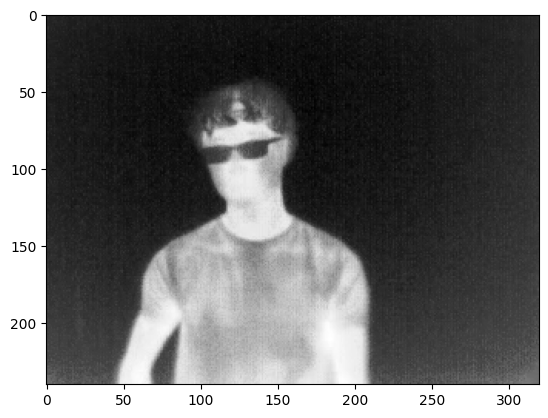

In [12]:
# extract one thermal frame
thermal_frame = thermal[0]
thermal_frame = thermal_frame.astype(np.float32)/255
print(thermal_frame.shape, thermal_frame.dtype, thermal_frame.min(), thermal_frame.max())

# Visualize thermal frame
plt.imshow(thermal_frame, cmap='gray')


In [13]:
data_files

['/tsukimi/reid/Re_ID/data_jelly_timothy.p',
 '/tsukimi/reid/Re_ID/data_jelly_shocky.p',
 '/tsukimi/reid/Re_ID/data_jelly_moria.p',
 '/tsukimi/reid/Re_ID/data_jelly_kaite.p',
 '/tsukimi/reid/Re_ID/data_jelly_missy.p',
 '/tsukimi/reid/Re_ID/data_jelly_christine.p',
 '/tsukimi/reid/Re_ID/data_jelly_georgie.p',
 '/tsukimi/reid/Re_ID/data_jelly_lorn.p',
 '/tsukimi/reid/Re_ID/data_jelly_gabrielle.p',
 '/tsukimi/reid/Re_ID/data_jelly_joshua.p',
 '/tsukimi/reid/Re_ID/data_jelly_colleen.p',
 '/tsukimi/reid/Re_ID/data_jelly_vicki.p',
 '/tsukimi/reid/Re_ID/data_jelly_yuhsun.p',
 '/tsukimi/reid/Re_ID/data_jelly_emily.p',
 '/tsukimi/reid/Re_ID/data_jelly_jordan.p',
 '/tsukimi/reid/Re_ID/data_jelly_carolyn.p']

In [36]:
out_root = '/tsukimi/reid/thermal_reid/data'
processed_file_paths = []
# Build a person name to person id mapping
name_mapping = {}
for uid, path in enumerate(data_files):
    name = Path(path).stem.split('_')[-1]
    name_mapping[name] = uid

    data = h5py.File(path, 'r', libver="latest")
    thermal=(data["thermal"][:])
    t, h, w=thermal.shape

    for idx in range(t):
        frame = thermal[idx]
        # frame = cv2.resize(frame, (128, 128))
        frame = cv2.normalize(frame, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        # frame = cv2.applyColorMap(frame, cv2.COLORMAP_JET)
        # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
        frame = Image.fromarray(frame)
        out_path = op.join(out_root, f'{idx:04d}_c0t{uid}.jpg')
        frame.save(out_path)
        processed_file_paths.append(out_path)
    #     break
    # break
    # process the data and save each frame separately 

In [18]:
name_mapping

{'timothy': 0,
 'shocky': 1,
 'moria': 2,
 'kaite': 3,
 'missy': 4,
 'christine': 5,
 'georgie': 6,
 'lorn': 7,
 'gabrielle': 8,
 'joshua': 9,
 'colleen': 10,
 'vicki': 11,
 'yuhsun': 12,
 'emily': 13,
 'jordan': 14,
 'carolyn': 15}

# Split `processed_file_paths` into `train`, `query`, and `gallery` sets

In [38]:
import shutil

In [47]:
train_ratio, gallery_ratio, query_ratio = 0.35, 0.55, 0.1
processed_file_names = os.listdir(out_root)
random.shuffle(processed_file_names)
train_file_names = processed_file_names[:int(len(processed_file_names)*0.35)]
gallery_file_names = processed_file_names[int(len(processed_file_names)*0.35):int(len(processed_file_names)*0.9)]
query_file_names = processed_file_names[int(len(processed_file_names)*0.9):]

In [48]:
# move train, query, gallery to corresponding folders
thermal_data_root = '/tsukimi/reid/thermal_reid'
train_data_dir = op.join(thermal_data_root, 'train')
query_data_dir = op.join(thermal_data_root, 'query')
gallery_data_dir = op.join(thermal_data_root, 'gallery')
os.makedirs(train_data_dir, exist_ok=True)
os.makedirs(query_data_dir, exist_ok=True)
os.makedirs(gallery_data_dir, exist_ok=True)

# move train data
for name in train_file_names:
    new_path = op.join(train_data_dir, name)
    shutil.move(op.join(out_root, name), new_path)

KeyboardInterrupt: 

In [ ]:
# move query data
for name in query_file_names:
    new_path = op.join(query_data_dir, op.basename(path))
    shutil.move(op.join(out_root, name), new_path)

# move gallery data
for name in gallery_file_names:
    new_path = op.join(gallery_data_dir, op.basename(path))
    shutil.move(op.join(out_root, name), new_path)

In [35]:
cv2.imread(out_path).shape

(240, 320, 3)

# Build and Register Dataset Class

In [ ]:
import sys
import os
import os.path as osp

from torchreid.data import ImageDataset


class ThermalDataset(ImageDataset):
    dataset_dir = 'thermal_reid'

    def __init__(self, root='/tsukimi/reid', **kwargs):
        self.root = osp.abspath(osp.expanduser(root))
        self.dataset_dir = osp.join(self.root, self.dataset_dir)

        # All you need to do here is to generate three lists,
        # which are train, query and gallery.
        # Each list contains tuples of (img_path, pid, camid),
        # where
        # - img_path (str): absolute path to an image.
        # - pid (int): person ID, e.g. 0, 1.
        # - camid (int): camera ID, e.g. 0, 1.
        # Note that
        # - pid and camid should be 0-based.
        # - query and gallery should share the same pid scope (e.g.
        #   pid=0 in query refers to the same person as pid=0 in gallery).
        # - train, query and gallery share the same camid scope (e.g.
        #   camid=0 in train refers to the same camera as camid=0
        #   in query/gallery).
        train_dir = osp.join(self.dataset_dir, 'train')
        query_dir = osp.join(self.dataset_dir, 'query')
        gallery_dir = osp.join(self.dataset_dir, 'gallery')

        train_paths = os.listdir(train_dir)

        super(ThermalDataset, self).__init__(train, query, gallery, **kwargs)

# Analyze Market101 Dataset

In [27]:
# load 
market_data_sample_path = '/workspace/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/query/1225_c4s5_041510_00.jpg'
market_data_sample = cv2.imread(market_data_sample_path)
print(market_data_sample.shape, market_data_sample.dtype, market_data_sample.max(), market_data_sample.min())

(128, 64, 3) uint8 255 0


In [ ]:
market_data_sample.

In [21]:
market_data_sample

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Jan 20 15:50:55 2014',
 '__version__': '1.0',
 '__globals__': [],
 'junk_index': array([[13870, 13871]], dtype=uint16)}